# Pymaceuticals Inc.
---

### Analysis

- Capomulin is better than Infubinol and Ceftamin since the final tumor volume rage is smaller than the latters when comparing the box plot for the treatment groups - Capomulin, Ramicane, Infubinol, Ceftamin and as good as Ramicane.
The strong correlation can be seen between the mouse weight vs. the average observed tumor volume for the entire Capomulin regimen by looking at the scatter plot.
The response of the treatment for the mouse id l509 shows that the best result can be seen around 35 days with the smallest tumor volume and the size increased again.
 

In [29]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem


# Set file path for study files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metada = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine data from two files into a single DataFrame
mouse_studyresults = pd.merge(study_results, mouse_metada, on="Mouse ID", how='left')
mouse_studyresults ["Tumor Volume (mm3)"] = mouse_studyresults ["Tumor Volume (mm3)"].round(2)
#mouse_studyresults = mouse_studyresults.sort_values(by="Timepoint")
mouse_studyresults.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# To get the nuber of mice
mouse_studyresults["Mouse ID"].nunique()


249

In [31]:
# To create data with Unique Mouse ID and Timepoint
unique_mouse_studyresults = mouse_studyresults.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
unique_mouse_studyresults
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_studyresults[mouse_studyresults.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice['Mouse ID'].unique() 

array(['g989'], dtype=object)

In [32]:
# To get all data for the duplicate Mouse ID
duplicate_mice_data = mouse_studyresults[mouse_studyresults['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
duplicate_mouse_ids=duplicate_mice_data['Mouse ID'].unique() 
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.00,0,Propriva,Female,21,26
137,g989,0,45.00,0,Propriva,Female,21,26
329,g989,5,48.79,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
620,g989,10,51.75,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
815,g989,15,51.33,1,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
950,g989,20,55.33,1,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [33]:
# To create a clean DataFrame with Unique Mouse ID 

mouse_no_dup_mouseid = unique_mouse_studyresults[~unique_mouse_studyresults['Mouse ID'].isin(duplicate_mouse_ids)]
clean_mouse_studyresults = mouse_no_dup_mouseid[mouse_no_dup_mouseid['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_mouse_studyresults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the count of mice in the clean DataFrame
clean_mouse_studyresults['Mouse ID'].nunique()

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_mouse_studyresults.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume.
average_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
stddev_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.apply(sem)


# Assemble the resulting series into a single summary DataFrame.
summary_statistics  = pd.DataFrame({
    "Mean Tumor Volume": average_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": stddev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675652,41.555,24.946279,4.994625,0.329336
Ceftamin,52.591011,51.775,39.288197,6.268030,0.469809
Infubinol,52.884663,51.820,43.130778,6.567403,0.492248
Ketapril,55.235745,53.700,68.555078,8.279799,0.603866
Naftisol,54.331720,52.505,66.173728,8.134724,0.596467
Placebo,54.033591,52.290,61.166371,7.820893,0.581322
Propriva,52.320743,50.445,43.850603,6.621979,0.544323
Ramicane,40.216974,40.675,23.487770,4.846418,0.320962
Stelasyn,54.233039,52.430,59.450545,7.710418,0.573111


In [36]:
# using agreegation method
summary_statistics = grouped_data.agg(['mean', 'median', 'var', 'std', 'sem'])

# Create the DataFrame format
styled_summary = summary_statistics.style.set_table_styles([{'selector': 'th','props': [('text-align', 'right'), ('font-weight', 'bold')]}])

# to display the DataFrame with bold title with right aligned
styled_summary.set_caption("Tumor Volume (mm3)").set_table_styles([{'selector': 'caption','props': [('font-weight', 'bold'), ('text-align', 'right')]}])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675652,41.555000,24.946279,4.994625,0.329336
Ceftamin,52.591011,51.775000,39.288197,6.268030,0.469809
Infubinol,52.884663,51.820000,43.130778,6.567403,0.492248
Ketapril,55.235745,53.700000,68.555078,8.279799,0.603866
Naftisol,54.331720,52.505000,66.173728,8.134724,0.596467
Placebo,54.033591,52.290000,61.166371,7.820893,0.581322
Propriva,52.320743,50.445000,43.850603,6.621979,0.544323
Ramicane,40.216974,40.675000,23.487770,4.846418,0.320962
Stelasyn,54.233039,52.430000,59.450545,7.710418,0.573111


<span style="font-size: 20px;"><b>Bar and Pie Charts</b></span>

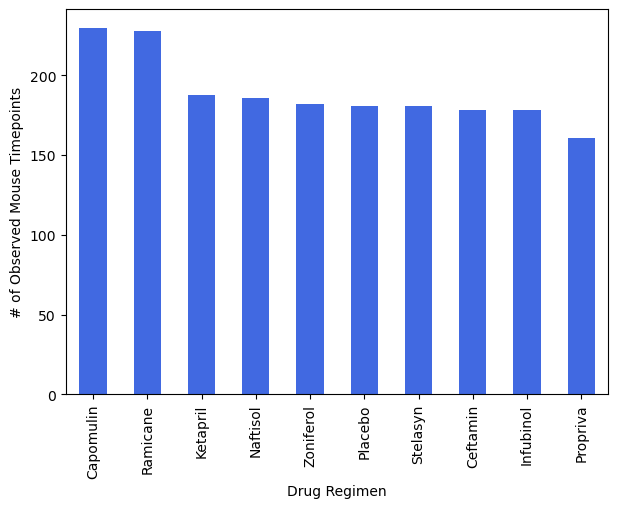

In [37]:
# create bar chart using pandas for the total number of rows (Mouse ID/Timepoints) for each drug regimen
grouped_data = mouse_studyresults.groupby('Drug Regimen').size()
grouped_data2=grouped_data.sort_values(ascending=False)
grouped_data2.plot(kind='bar', color="royalblue", figsize=(7, 5), xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

# Show the plot
plt.show()

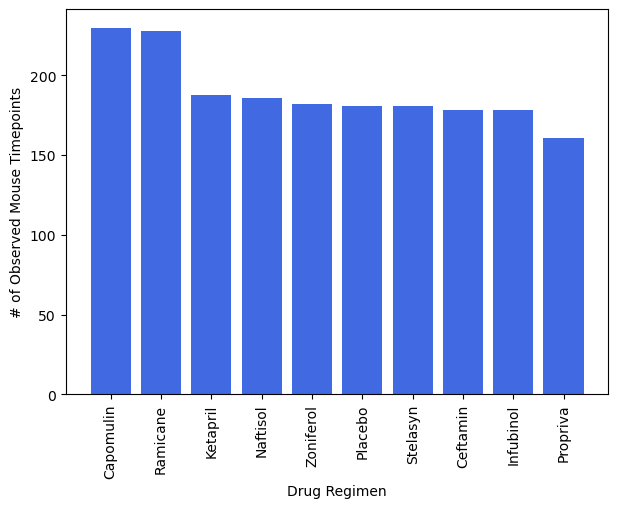

In [38]:
# create bar chart using pyplot for the total number of rows (Mouse ID/Timepoints) for each drug regimen
 
plt.figure(figsize=(7,5))
plt.bar(grouped_data2.index, grouped_data2, color = "royalblue")
plt.xticks(rotation=90)
# add lables 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#show the plot
plt.show()


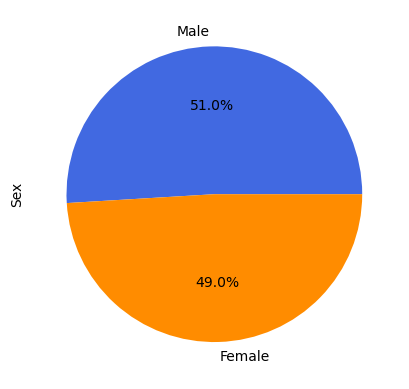

In [39]:
# Create pie chart using pandas for distribution of female vs. male
sex_counts = clean_mouse_studyresults['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['royalblue', 'darkorange'])
plt.ylabel("Sex")
plt.show()

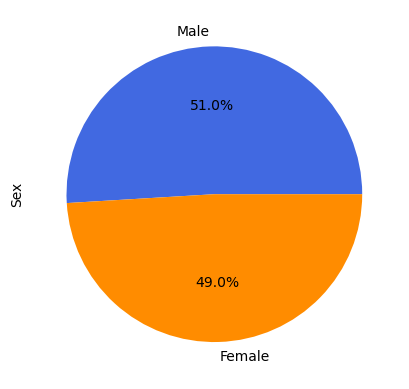

In [40]:
# Create pie chart using pyplot for distribution of female vs. male
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=0, colors=['royalblue', 'darkorange'])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Treatment_data = clean_mouse_studyresults[clean_mouse_studyresults['Drug Regimen'].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint=clean_mouse_studyresults.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#final_tumor_vol = pd.merge(final_timepoint, Treatment_data, on=['Mouse ID', 'Timepoint'])
final_tumor_vol = pd.merge(final_timepoint, clean_mouse_studyresults, on=['Mouse ID', 'Timepoint'])

In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatments:
    tumor_vol_data.append(final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_data = final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print or store the outliers as needed
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.32
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


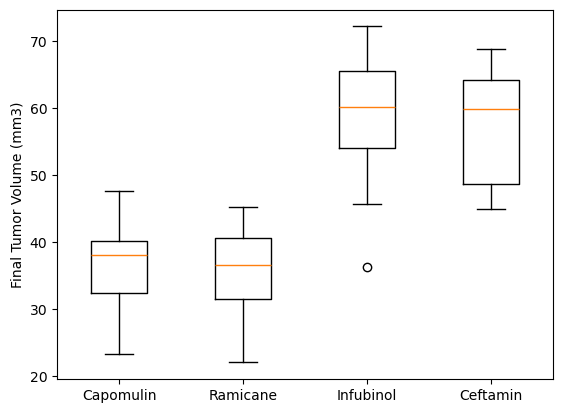

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot for each treatment group
boxplot_data = [final_tumor_vol[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]

# Plot the box plot
ax.boxplot(boxplot_data)

# Set labels and title
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel('Final Tumor Volume (mm3)')


# Show the plot
plt.show()

## Line and Scatter Plots

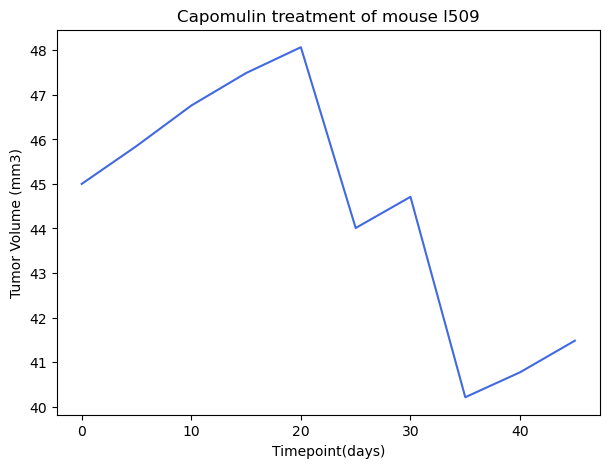

In [44]:
# Create the dataset for mice treated with Capomulin
capomulin_data = clean_mouse_studyresults[clean_mouse_studyresults['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID
selected_mouse = 'l509' 

# Filter the data for the selected mouse
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(7, 5))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='royalblue')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse}')
plt.show()

In [45]:
capomulin_avg_data = clean_mouse_studyresults[clean_mouse_studyresults['Drug Regimen'] == 'Capomulin']

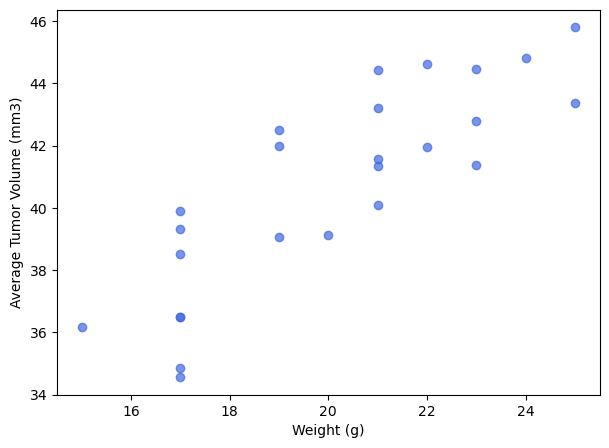

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# calculate the average tumor volume and mouse weight for each mouse
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# create a scatter plot
plt.figure(figsize=(7,5))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], color='royalblue', alpha=0.7)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


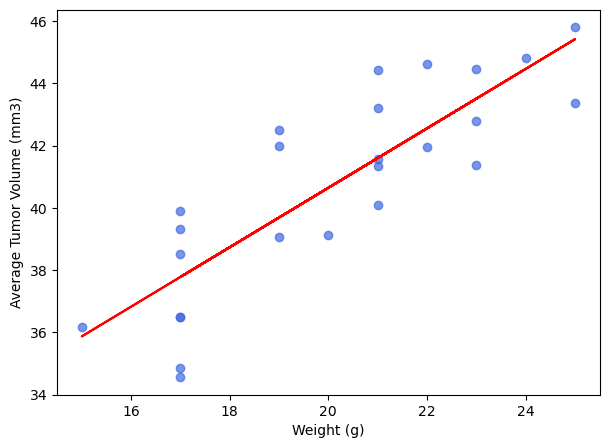

In [21]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

x_values = avg_data['Weight (g)']
y_values = avg_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values, color='royalblue', alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

